#Pytorch Workflow

Resources: https://www.learnpytorch.io/



In [ ]:
covered_topics = {1: "data (prepare and load)",
                  2: "build model",
                  3: "fitting the model to the data (training)",
                  4: "making predictions and evaluating a model (inference)",
                  5: "Saving a loading a model",
                  6: "putting it all together"}

In [ ]:
import torch
from torch import nn #nn contains building blocks for neural networks
import matplotlib.pyplot as plt

#Check Pytorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (preparing and loading)

Almost everything:


*   Excel spreadsheets
*   Images
*   Videos
*   Audio
*   Text
*   DNA


Machine learning is a game of two parts
1. Get data into numerical representation
2. Build model to learn patterns in that numerical representation

Let's create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with a known parameters.




In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into datasets

1. Training set 60-80%
2. Validation set 10-20%
3. Test set 10-20%

Let's create a training set with our data

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we visualize better our data?

This is where the data explorer's motto comes in

Visualize visualize VISUALIZE!!



In [ ]:
def plot_predictions(train_data=X_train, train_labels=Y_train,
                     test_data=X_test, test_labels=Y_test,
                     predictions=None):
  """
  Plots training and test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});



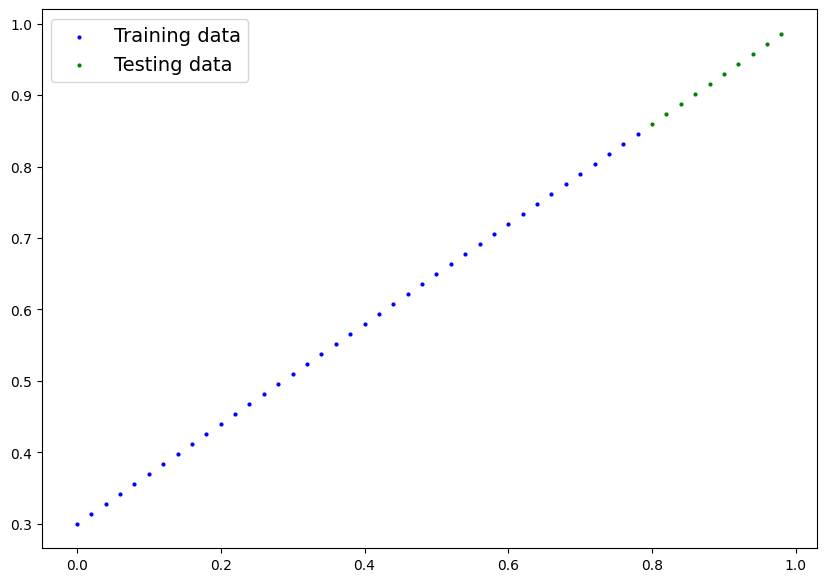

In [ ]:
plot_predictions()

## 2. Building a Pytorch model


What the model does:

Start with random values

Look at training data and adjust the random value to better represent the ideal values (the weigth and bias values previously created)


How does it do it?

1.Gradient Descent

2.Backpropagation

In [ ]:
from torch import nn

# Create Linear regression model class
class LinearRregressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



###Pytorch Model building essentials

* torch.nn contains all of the building blocks for computational graphs (a neural networks can be considered a computational graph)
* torch.nn.Parameter what parameters should our model try and learn often Pytorch layer from torch.nn will set these for us
* torch.nn.Module The base class for all neural network modules if you subclass it you should overwrite it forward()
* torch.optim this is where the optimizers in Pytorch live
* def forward() All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


See more of these modules via the Pytorch cheatsheet:https://pytorch.org/tutorials/beginner/ptcheat.html




## Checking the contens in the Pytorch Model

Model Parameters can be checked using .parameters().

In [ ]:
# Create random seed
torch.manual_seed(42)

# We create a model
model_0 = LinearRregressionModel()

# Checkout the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using 'torch.interference_mode()'

Let's see how well predicts y_test based on x_test

When passing data to the model it's going to run through the forward() method

In [ ]:
y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

#Inference mode disables grad_fn and is preferable than torch.nograd

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

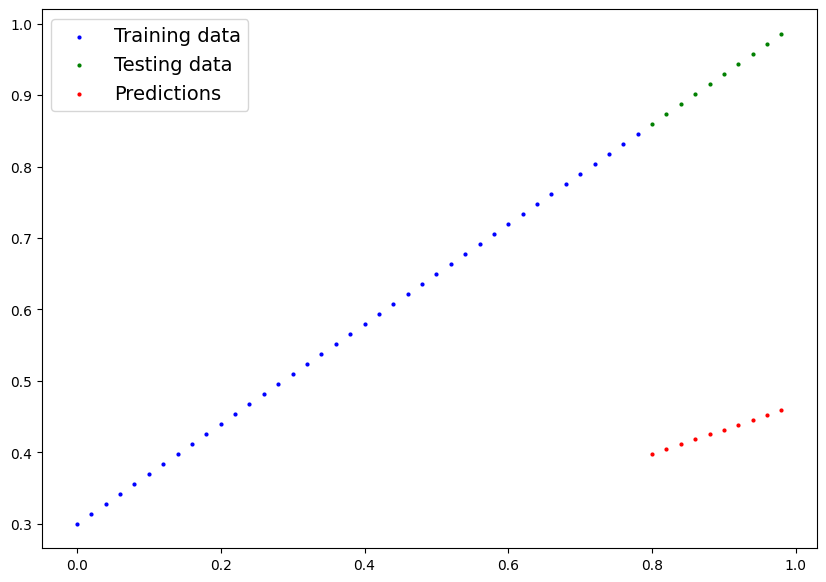

In [ ]:
plot_predictions(predictions=y_preds)

##3. Train Model

The whole idea is for a training model to move from some uknown parameters to some known parameters.

From a poor representation of data to a better one.

One way to measure how the models predictions are is through loss functions.

Note: Loss function can be called also cost function or criterion

Function that measures how wrong the model's predictions are.


Things we need to train:

***Loss function***



***Optimizer:*** takes into account the loss of a model and adjust the model's parameters (weight and bias in our case) to improve the loss function


And specifically in Pytorch we need a training loop and a testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out the parameters (value that sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent)

optimizer = torch.optim.SGD(params=model_0.parameters(),
                          lr = 0.01)# lr = learning rate the most important hyperparameter


In [ ]:
loss_fn

L1Loss()

### Building a training loop (and testing loop) in Pytorch

Things we need:

1. Loop through data

2. Forward pass (this involves data moving through our model's forward() functions) - also called forward propagation

3. Calculate the loss (compare forward pass predictions to ground truth labels)

4. Optimizer zero grad

5. Loss backward (move backwards through the network to calculate the gradients of each of the parameters of our model with respect our loss) (Backpropagation)

6. Optimizer step (Gradient descent)





In [ ]:
# An epoch is one loop through the data ...
epochs = 200
### Training
epoch_count = []
loss_values = []
test_loss_values = []

# 1 Loop through the data
for epoch in range(epochs):
  # set thed model to training mode
  model_0.train() # train mode in Python sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, Y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform the gradient descent)
  optimizer.step() #By default how the optimizer changes will accumulate through the loop so...
  #we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval() # turns off fifferent settings in the model not needed for evaluation
  with torch.inference_mode():# turns off gradient tracking
    # 1. do the forward pass
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, Y_test)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

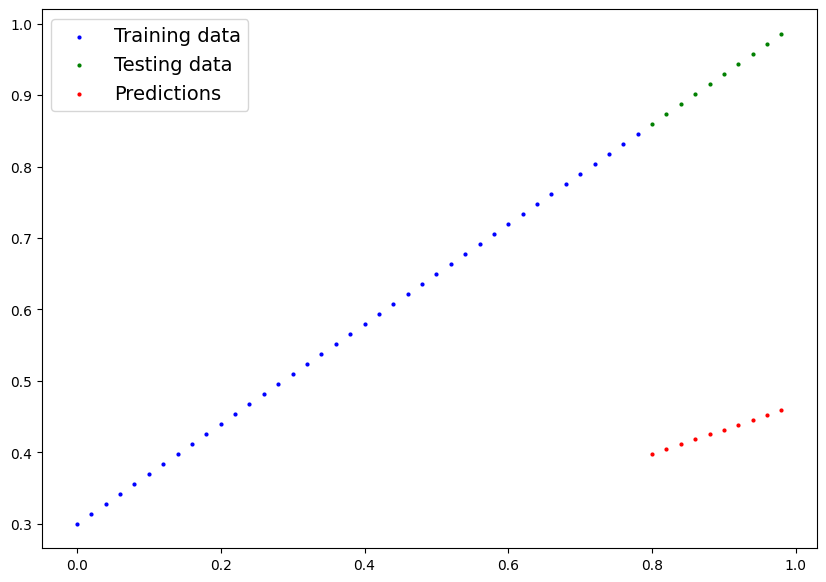

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

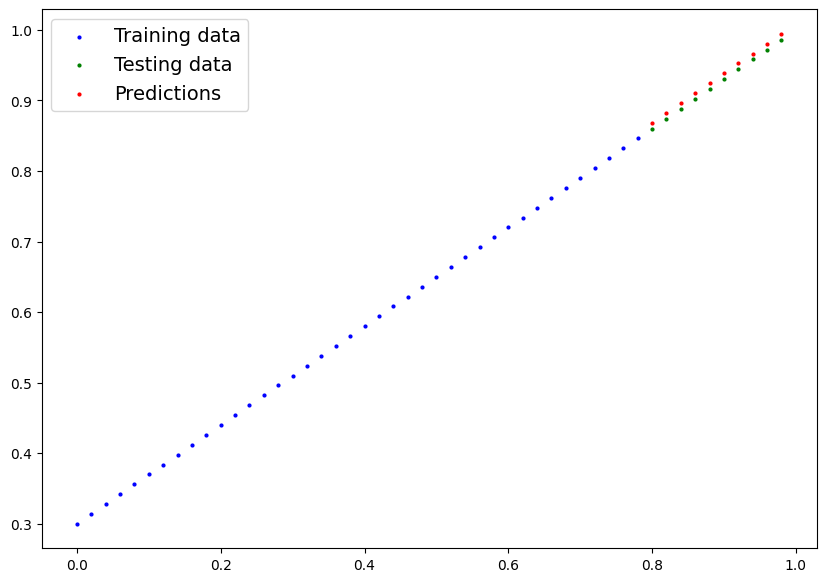

In [ ]:
plot_predictions(predictions=y_preds_new)

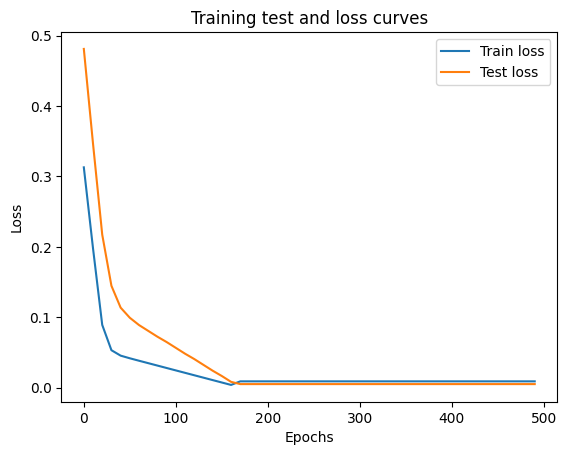

In [ ]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training test and loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Saving a model in Pytorch
3 main methods:

1. 'torch.save()'
2. 'torch.load()'
3. 'torch.nn.Module.load_state_dict()'

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH} ")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_0.pth 


## Loading a Pytorch Model

Since we saved our model's state_dict() rather than the entire model, we'll create a new instance of our model class and load the saved state_dict() into that

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRregressionModel()
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

state_dict = torch.load(f=MODEL_SAVE_PATH)
loaded_model_0.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# Compare model preds with oringinal model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting all together

In [ ]:
# Import Pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

Create device agnostic code

This means if we've got no acces on the GPU (our code will use it for faster computing)
If no GPU is available, the code will default to using CPU


In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cuda


## 6.1 Data

In [ ]:
# Create some data using the linear regression formula y=ax+b
weight = 0.8
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

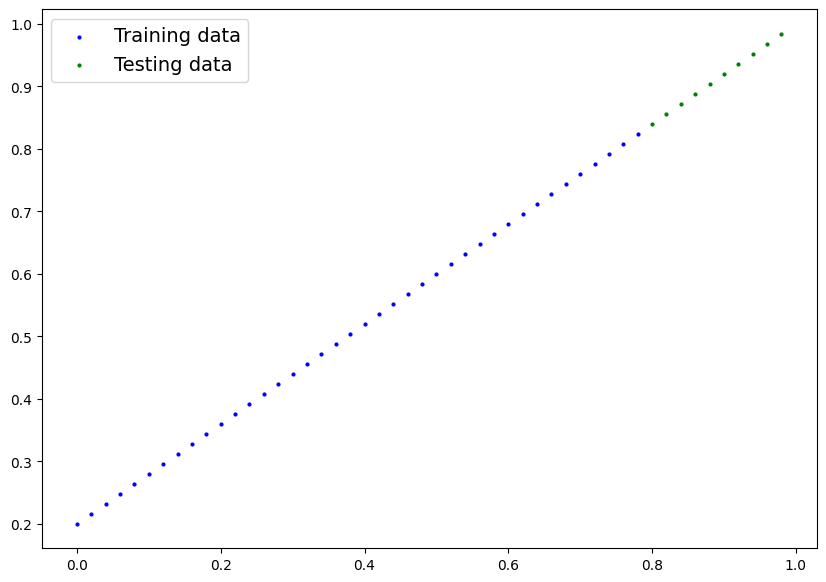

In [ ]:
# Plot the data
# Note: if you have the plot_predictions() function loaded, this will be error

plot_predictions(X_train, Y_train, X_test, Y_test)

#6.2 Building a Pytorch linear model

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRregressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRregressionModelV2()
model_1, model_1.state_dict()

(LinearRregressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], Y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640]]))

In [ ]:
#Check the current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use in the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

Wee need

Loss Function

Optimizer

Training Loop

Testing Loop



In [ ]:
# Setup loss function and Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
#Let's write the training loop

torch.manual_seed(42)

epochs = 200

# Put data to the same device
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, Y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer forward
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, Y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")


Epoch: 0 | Loss: 0.6161779165267944 | Test loss: 0.5849762558937073 
Epoch: 10 | Loss: 0.5009680986404419 | Test loss: 0.45026642084121704 
Epoch: 20 | Loss: 0.3857581913471222 | Test loss: 0.3155565857887268 
Epoch: 30 | Loss: 0.2705483138561249 | Test loss: 0.180846706032753 
Epoch: 40 | Loss: 0.15533843636512756 | Test loss: 0.046136897057294846 
Epoch: 50 | Loss: 0.05875825881958008 | Test loss: 0.06886561214923859 
Epoch: 60 | Loss: 0.04580378159880638 | Test loss: 0.09473040699958801 
Epoch: 70 | Loss: 0.041819483041763306 | Test loss: 0.09405827522277832 
Epoch: 80 | Loss: 0.03831038996577263 | Test loss: 0.08853326737880707 
Epoch: 90 | Loss: 0.034879546612501144 | Test loss: 0.08094760775566101 
Epoch: 100 | Loss: 0.03144557774066925 | Test loss: 0.07267507165670395 
Epoch: 110 | Loss: 0.028006771579384804 | Test loss: 0.06440252810716629 
Epoch: 120 | Loss: 0.024577612057328224 | Test loss: 0.056816864758729935 
Epoch: 130 | Loss: 0.021141953766345978 | Test loss: 0.048544377

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model in evaluation mode

model_1.eval()
X_test.to(device)
y_preds.to(device)
# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8484],
        [0.8644],
        [0.8804],
        [0.8964],
        [0.9123],
        [0.9283],
        [0.9443],
        [0.9603],
        [0.9762],
        [0.9922]], device='cuda:0')

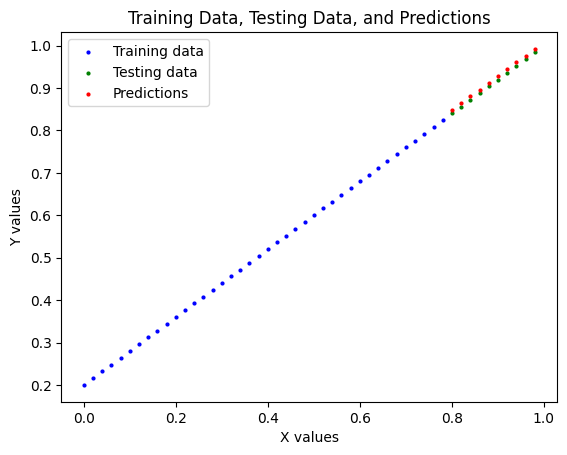

In [ ]:
#Check out our model predictions visually

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot predictions in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.title("Training Data, Testing Data, and Predictions")
    plt.show()

# Assuming you have X_train, Y_train, X_test, Y_test, and y_preds defined
plot_predictions(X_train.cpu().numpy(), Y_train.cpu().numpy(), X_test.cpu().numpy(), Y_test.cpu().numpy(), y_preds.cpu().detach().numpy())

### 6.5 Saving & loading a training model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dic
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
# Load a Pytorch model
#Create an instance of the model class
loaded_model_1 = LinearRregressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device

loaded_model_1.to(device)

LinearRregressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
#Evaluate the loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')